# Global Video Game Sales and Reviews Analysis

##### Source: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-and-reviews

In [13]:
#import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset

path = r'C:\Users\Jourdan\Desktop\Video Games Sales.csv'
video_game_sales = pd.read_csv(path)

#view the dataset

video_game_sales

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [3]:
#rename the columns that have multiple words

video_game_sales.rename(columns = {'Game Title': 'Game_Title',
                                  'North America': 'North_America',
                                  'Rest off World': 'Rest_of_World',
                                  'Global': 'Units_Sold'},
                       inplace = True)

#view the updated columns

video_game_sales

,index,Rank,Game_Title,Platform,Year,Genre,Publisher,North_America,Europe,Japan,Rest of World,Units_Sold,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [4]:
#checking the dataset for missing values

null = video_game_sales.isnull().sum()

#view the output
null

index             0
Rank              0
Game_Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North_America     0
Europe            0
Japan             0
Rest of World     0
Units_Sold        0
Review            0
dtype: int64

In [29]:
#drop the null values

video_game_sales_clean = video_game_sales.dropna()

#view the output and check for null

video_game_sales_clean.isnull().sum()

index            0
Rank             0
Game_Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North_America    0
Europe           0
Japan            0
Rest of World    0
Units_Sold       0
Review           0
dtype: int64

## Explore the Data

In [30]:
#observe the numerical columns 

video_game_sales_clean.describe()

,index,Rank,Year,North_America,Europe,Japan,Rest of World,Units_Sold,Review
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,950.716720,951.716720,2003.766773,1.262109,0.710517,0.320980,0.207055,2.500532,79.038243
std,550.234127,550.234127,5.895369,1.967797,1.155922,0.729295,0.345141,3.587041,10.652957
min,0.000000,1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,474.250000,475.250000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,950.500000,951.500000,2005.000000,0.820000,0.440000,0.020000,0.130000,1.530000,81.095000
75%,1426.750000,1427.750000,2008.000000,1.377500,0.820000,0.307500,0.220000,2.547500,86.265000
max,1906.000000,1907.000000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


Note that for rank, the lower the number the better. The min is 1 but 1 in this instance is a good rank and the max or lowest is 1907. 

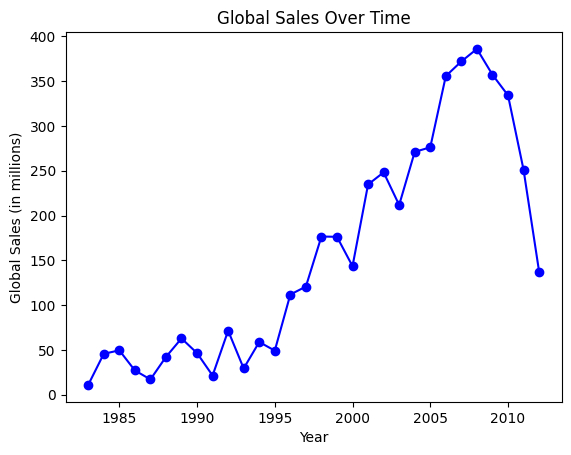

In [32]:
#time series analysis for sales over time

yearly_sales = video_game_sales_clean.groupby('Year')['Units_Sold'].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', 
         color='b')
plt.title('Global Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()


Video games sales were extremely low in the beginning years up until 1995 where sales slowly began to increase for the most part. Sales peaked around 2006 and then we see a steady decline in sales after that.

C:\Users\Jourdan\AppData\Local\Temp\ipykernel_18548\3017324238.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = video_game_sales.corr()


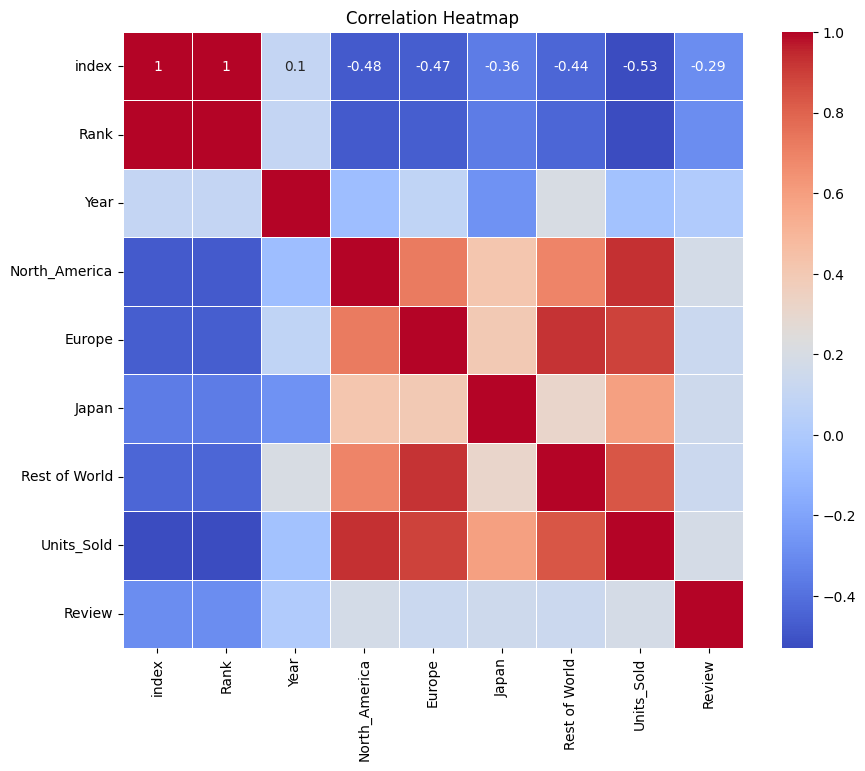

In [16]:
#correlation matrix of numericals

correlation = video_game_sales.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

This heatmap is used to show correlation between different numerical values. 

Year has a low correlation between every value.

Each country has a high correlation in regards to one another which could indicate similar preferences on certain game genres in each country, games being released at the same times, global campaigns and promotions, or online multiplayer communities encouraging sales in different countries to allow cooperative play. 

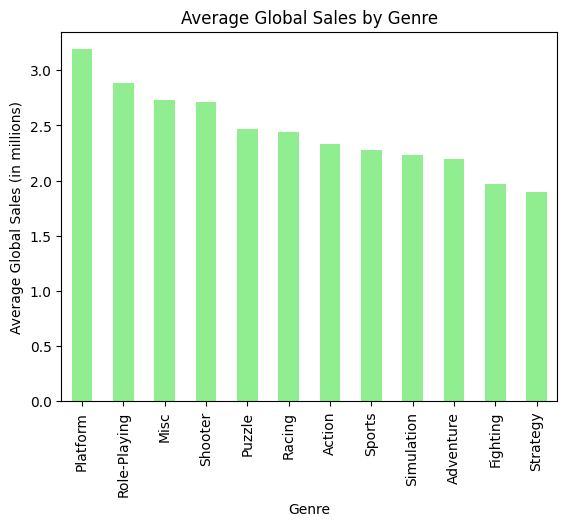

In [36]:
#bar chart showing what genres are most popular based on sales

genre_sales= video_game_sales_clean.groupby('Genre')['Units_Sold'].mean(
).sort_values(ascending=False)
genre_sales.plot(kind='bar', color='lightgreen')
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (in millions)')
plt.show()

The most popular genre is Platform and the least popular is Strategy. 

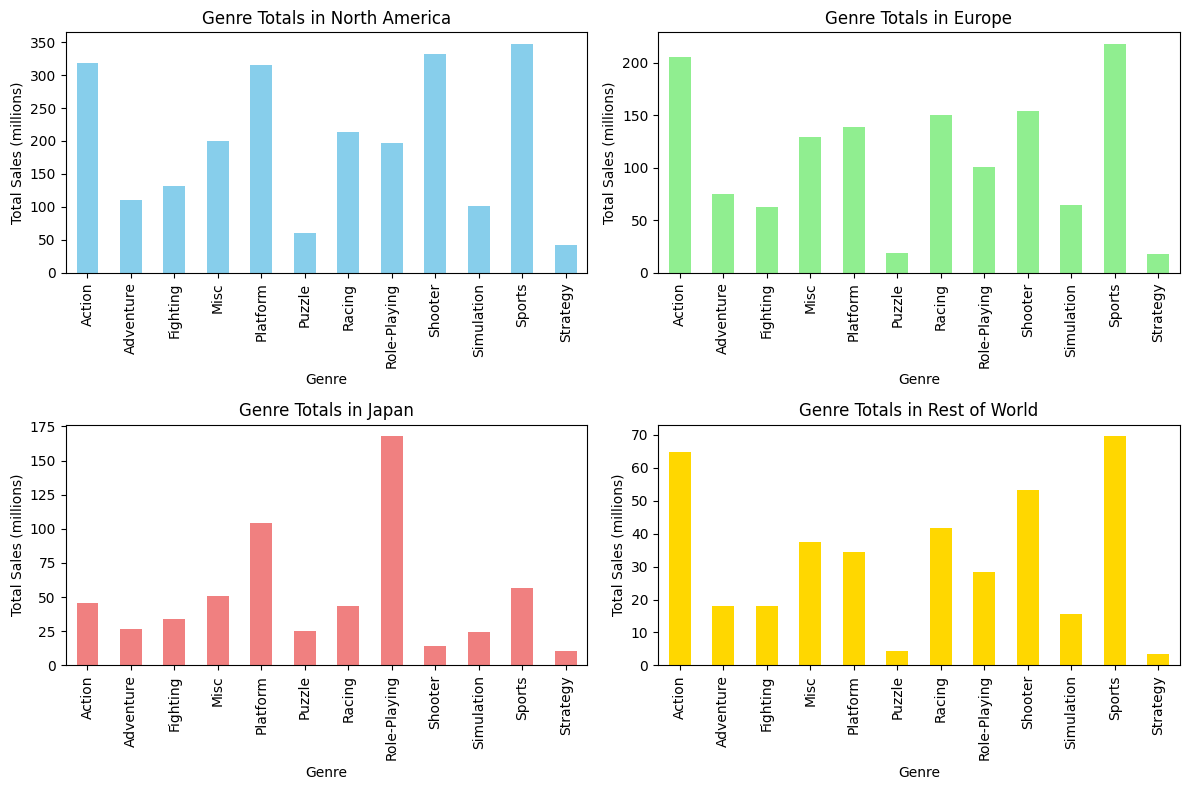

In [42]:
#plotting the distribution of genres by country

genre_totals_by_country = video_game_sales_clean.groupby('Genre')[['North_America',
                                                             'Europe', 'Japan',
                                                             'Rest of World']
                                                           ].sum()

#plot
plt.figure(figsize=(12, 8))

#bar chart for North America genres

plt.subplot(2, 2, 1)
genre_totals_by_country['North_America'].plot(kind='bar', color='skyblue')
plt.title('Genre Totals in North America')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')

#bar chart for Europe genres

plt.subplot(2, 2, 2)
genre_totals_by_country['Europe'].plot(kind='bar', color='lightgreen')
plt.title('Genre Totals in Europe')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')

#bar chart for Japan genres

plt.subplot(2, 2, 3)
genre_totals_by_country['Japan'].plot(kind='bar', color='lightcoral')
plt.title('Genre Totals in Japan')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')

#bar chart for Rest of the World genres

plt.subplot(2, 2, 4)
genre_totals_by_country['Rest of World'].plot(kind='bar', color='gold')
plt.title('Genre Totals in Rest of World')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')

#improving visualization of the output

plt.tight_layout()

plt.show()

These charts can assist with targetting certain audiences in each country.

North America has a strong interest in Action, Platform, Shooters, and Sports games. Very low interest in Strategy and Puzzle which can be seen by the amount of sales. 

Europe has a strong interest in Action and Sports games. Puzzle and Strategy were also extremely low here as well.

Japan has the highest interest in Role-Playing games. Adventure, Fighting, Puzzle, Shooter, Simulation and Strategy were significantly low.

The rest of the world has high interest in Action, Shooter, and Sports. Strategy and Puzzle once again are significantly low in comparison.

Majority of the world favors Action and Sports games where Strategy and Shooter games show the smallest interest in each country. 